In [1]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
kpmg = pd.read_excel('KPMG.xlsx')
kpmg.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
kpmg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
kpmg.describe

<bound method NDFrame.describe of        transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1

In [5]:
# describe các biến object
kpmg.describe(include=object)

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
#describe all
kpmg.describe(include='all', datetime_is_numeric=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


In [7]:
# count số dòng bị null ở mỗi cột
kpmg.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = kpmg.dropna()
df_dropna_all.info()
df_dropna_all.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_order = kpmg.dropna(subset=['online_order'])
df_dropna_order.info()
df_dropna_order.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      195
product_line               195
product_class              195
product_size               195
list_price                   0
standard_cost              195
product_first_sold_date    195
dtype: int64

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = kpmg.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = kpmg.fillna(method='ffill')
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = kpmg.fillna(method='bfill')
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorial Data

In [13]:
# load sheet Demographic và hiển thị top head
kpmg_demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
kpmg_demo.head()

C:\Users\Bao Lap\AppData\Local\Temp/ipykernel_15200/1726026461.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  kpmg_demo = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [14]:
# in ra info bảng
kpmg_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
kpmg_demo.describe(include='object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA row
kpmg_demo = kpmg_demo.dropna()

In [17]:
# In ra các giá trị unique của cột gender
kpmg_demo['gender'].unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [18]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
kpmg_demo['gender'] = kpmg_demo["gender"].replace({"F":"Female", "U":"Unisex", "Femal":"Female", "M":"Male"})
kpmg_demo["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
kpmg_demo['Age']= int(pd.to_datetime('today').strftime('%Y')) - kpmg_demo['DOB'].dt.strftime('%Y').astype(int)
print('min age: ', kpmg_demo['Age'].min())
print('max age: ', kpmg_demo['Age'].max())

min age:  20
max age:  91


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
kpmg_demo['Age_Group'] = pd.cut(kpmg_demo['Age'], bins=[0, 36, 55, 100], labels=['Young Adults','Middle Age','Older'])
kpmg_demo[kpmg_demo['Age'] == 60]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_Group
30,31,Star,Praton,Female,3,1962-11-24,Staff Accountant III,Telecommunications,High Net Worth,N,testâ testâ«,Yes,14.0,60,Older
313,314,Catie,Advani,Female,27,1962-08-25,Marketing Assistant,Retail,High Net Worth,N,åè£½æ¼¢èª,Yes,5.0,60,Older
399,400,Sibeal,Fellow,Female,86,1962-05-19,Financial Analyst,Financial Services,Mass Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,No,5.0,60,Older
462,463,Allis,Blanche,Female,9,1962-03-30,Senior Cost Accountant,Financial Services,Mass Customer,N,1;DROP TABLE users,Yes,20.0,60,Older
523,524,Florence,Held,Female,16,1962-09-09,Nurse,Retail,Mass Customer,N,ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾,No,11.0,60,Older
611,612,Grange,Skillington,Male,50,1962-01-12,GIS Technical Architect,Health,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,No,14.0,60,Older
617,618,Lucho,Mitie,Male,17,1962-04-05,Electrical Engineer,Manufacturing,Affluent Customer,N,Ù¡Ù¢Ù£,Yes,18.0,60,Older
812,813,Lisette,Nesbit,Female,12,1962-03-21,Account Representative III,Health,Mass Customer,N,1;DROP TABLE users,No,14.0,60,Older
1029,1030,Nariko,Dummigan,Female,9,1962-05-05,Food Chemist,Health,Mass Customer,N,â«testâ«,No,5.0,60,Older
1064,1065,Chilton,Ghirigori,Male,8,1962-06-27,Quality Engineer,Financial Services,Mass Customer,N,-100,Yes,8.0,60,Older


# 2. Data Completeness

In [21]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic
kpmg = kpmg.dropna()
kpmg_join = kpmg.merge(kpmg_demo, how='left', on='customer_id')
kpmg_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [22]:
kpmg_join[kpmg_join['first_name'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_Group
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,19989,0,714,2017-04-27,1.0,Approved,Norco Bicycles,Standard,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19436,19992,11,1374,2017-09-14,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19993,13,5,2017-04-28,0.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19438,19994,77,2618,2017-12-23,0.0,Approved,Norco Bicycles,Road,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation

In [23]:
# tính tổng khách hàng bằng hàm nunique
kpmg_join['customer_id'].nunique()

3492

In [40]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
kpmg_join['Year_month'] = kpmg_join['transaction_date'].dt.strftime('%Y, %m')
kpmg_join.groupby(['Year_month'])['customer_id'].nunique()

Year_month
2017, 01    1321
2017, 02    1258
2017, 03    1277
2017, 04    1284
2017, 05    1281
2017, 06    1238
2017, 07    1327
2017, 08    1346
2017, 09    1240
2017, 10    1378
2017, 11    1281
2017, 12    1294
Name: customer_id, dtype: int64

In [25]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
kpmg_join['Gross_margin'] = kpmg_join['list_price'] - kpmg_join['standard_cost']
kpmg_join.groupby(['Year_month']).agg({'Gross_margin':'sum'}).reset_index()

,Year_month,Gross_margin
0,"2017, 01",915151.359988
1,"2017, 02",852514.230000
2,"2017, 03",865312.550000
3,"2017, 04",888856.890000
4,"2017, 05",904003.210000
5,"2017, 06",841815.260000
6,"2017, 07",919677.790000
7,"2017, 08",951376.270000
8,"2017, 09",843736.130000
9,"2017, 10",968986.414984


In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
kpmg_join.groupby(['online_order','order_status']).agg({"list_price": ["sum", "count"]}).reset_index()

online_order order_status   list_price      
                                     sum count
0          0.0     Approved  10666230.05  9631
1          0.0    Cancelled     86837.88    75
2          1.0     Approved  10670179.59  9642
3          1.0    Cancelled    108924.20    97

# 4. Data Visualization

In [58]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
price = kpmg_join.groupby(['order_status']).agg({'list_price':'sum'}).reset_index()
price

,order_status,list_price
0,Approved,21336409.64
1,Cancelled,195762.08


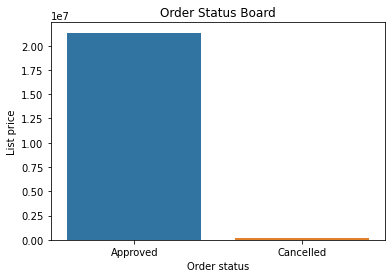

In [64]:
sns.barplot(x= price.order_status, y= price.list_price, data= price)
plt.title('Order Status Board')
plt.xlabel('Order status')
plt.ylabel('List price')
ylim=(1000000)
yticks=[0,1000000,2000000,3000000]
plt.show()

In [42]:
kpmg_join['month'] = kpmg_join['transaction_date'].dt.strftime('%m')
kpmg_join['Gross_margin'] = kpmg_join['list_price'] - kpmg_join['standard_cost']
test = kpmg_join.groupby(['month']).agg({'Gross_margin':'sum'}).reset_index()

test

,month,Gross_margin
0,01,915151.359988
1,02,852514.230000
2,03,865312.550000
3,04,888856.890000
4,05,904003.210000
5,06,841815.260000
6,07,919677.790000
7,08,951376.270000
8,09,843736.130000
9,10,968986.414984


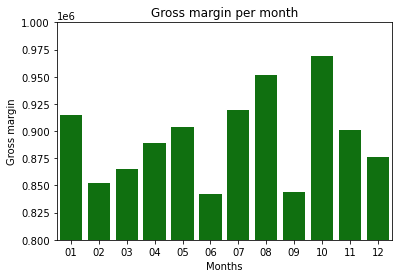

In [71]:
sns.barplot(x=test.month, y=test.Gross_margin, data=test, color='g')
plt.title('Gross margin per month')
plt.xlabel('Months')
plt.ylabel('Gross margin')
plt.ylim(800000,1000000)
plt.show()

In [138]:
kpmg_join['month'] = kpmg_join['transaction_date'].dt.strftime('%m')
cus_count = kpmg_join.groupby(['month'])['customer_id'].nunique()
cus_count

month
01    1321
02    1258
03    1277
04    1284
05    1281
06    1238
07    1327
08    1346
09    1240
10    1378
11    1281
12    1294
Name: customer_id, dtype: int64

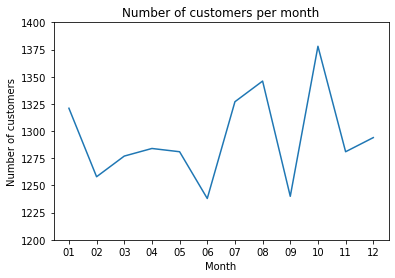

In [139]:
sns.lineplot(data= cus_count)
plt.title('Number of customers per month')
plt.xlabel('Month')
plt.ylabel('Number of customers')
plt.ylim(1200,1400)
plt.show()

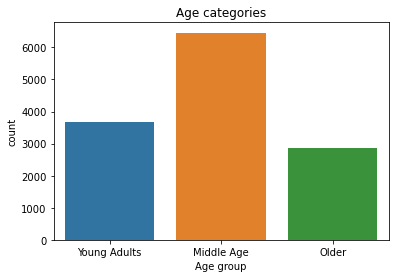

In [150]:
kpmg_ = kpmg_join.dropna()
sns.countplot(x='Age_Group', data=kpmg_)
plt.title('Age categories')
plt.xlabel('Age group')
plt.show()

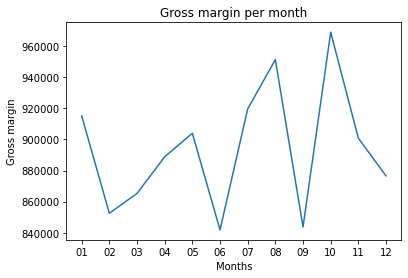

In [164]:
kpmg_join['month'] = kpmg_join['transaction_date'].dt.strftime('%m')
kpmg_join['Gross_margin'] = kpmg_join['list_price'] - kpmg_join['standard_cost']
test = kpmg_join.groupby(['month']).agg({'Gross_margin':'sum'}).reset_index()

test
sns.lineplot(x=test.month, y=test.Gross_margin, data=test)
plt.title('Gross margin per month')
plt.xlabel('Months')
plt.ylabel('Gross margin')
plt.show()